# Dataset de la clasificación de estrellas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [48]:
data = pd.read_csv("../datasets/stars-classification/Skyserver_SQL2_27_2018 6_51_39 PM.csv")
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


No has datos nulos o missing values, por lo que no es necesaria la limpieza del dataset

## Representación de los datos

In [7]:
sns.set()

Text(0.5,1,'Histograma de Frecuencia Acumulada en Distancia (redshift)')

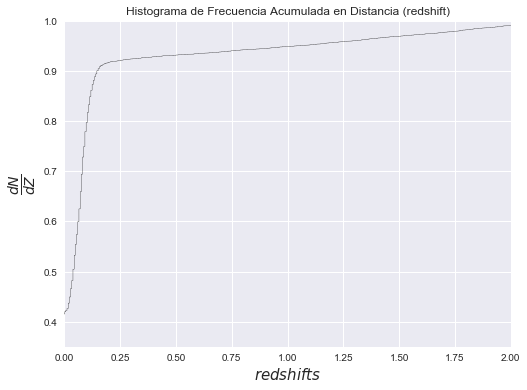

In [19]:
plt.figure(figsize=(8,6))
plt.hist(data.redshift, 
         bins=int(1e3),
        histtype="step",
        density=True,
        cumulative=True,
        color="k")
plt.xlim(0,2.0)
plt.ylim(0.35,1.0)
plt.xlabel(r'$redshifts$', size=15)
plt.ylabel(r'$\frac{dN}{dZ}$', size=20)
plt.title("Histograma de Frecuencia Acumulada en Distancia (redshift)")

Alrededor del $90\%$ de los objetos de nuestro dataset está concentrado en un redshift de hasta $0.20$.

## Funciones de densidad de probabilidad de cada clase en cada uno de los filtros

In [23]:
featuredf = data.drop(["class","objid","run","rerun","camcol","field","specobjid","plate","mjd","fiberid","redshift"], axis=1)

In [37]:
featurecols = featuredf.columns
featurecols

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z'], dtype='object')

In [38]:
astr_types = data["class"].unique() #STAR, GALAXY, SQO
astr_types

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

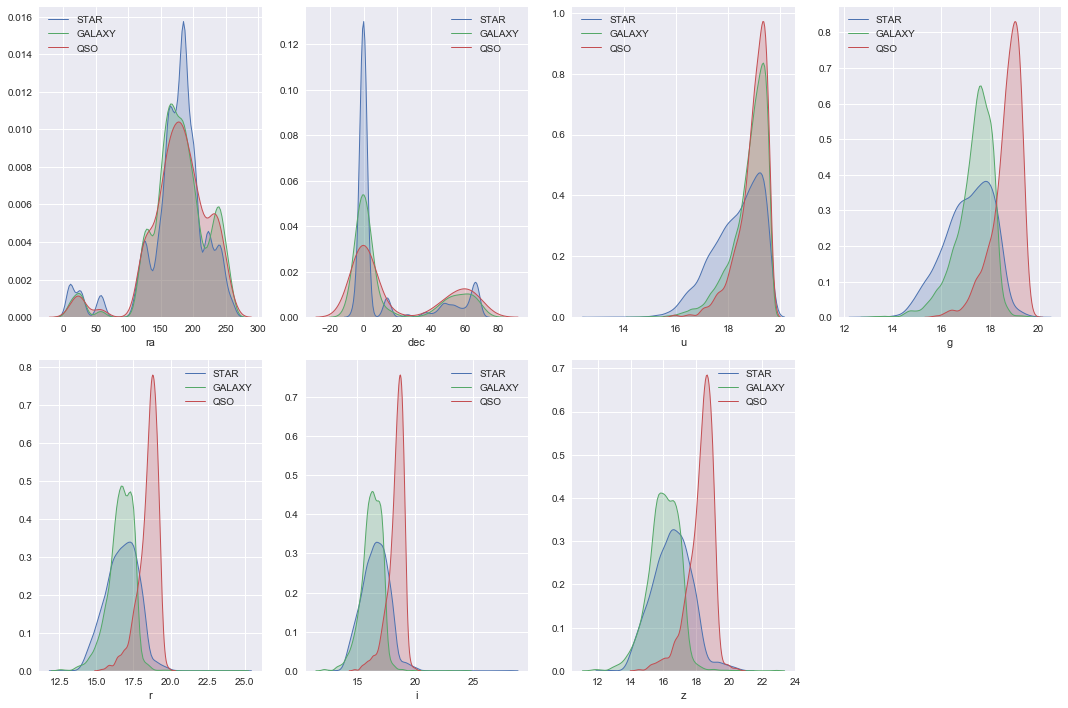

In [36]:
plt.figure(figsize=(15,10))

for i in range(len(featurecols)):
    plt.subplot(2,4,i+1)
    for j in range(len(astr_types)):
        sns.distplot(data[data["class"] == astr_types[j]][featurecols[i]],
                    hist=False, 
                    kde=True,
                    kde_kws={
                        "shade": True,
                        "linewidth": 1
                    },
                    label=astr_types[j])
        plt.legend()
        plt.xlabel(featurecols[i])
        plt.tight_layout()

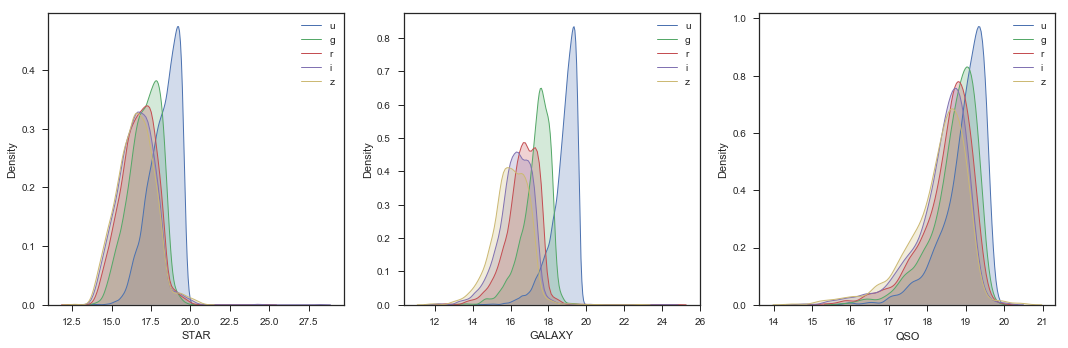

In [41]:
featurecols = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(15,5))
sns.set_style("ticks")
for i in range(len(astr_types)):
    plt.subplot(1, 3, i+1)
    for j in range(len(featurecols)):
        sns.distplot(data[data['class']==astr_types[i]][featurecols[j]], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 1}, 
                     label = featurecols[j])
    plt.legend()
    plt.xlabel(astr_types[i])
    plt.ylabel('Density')
plt.tight_layout()

## Matriz de correlación
Construyamos la matriz de correlación de nuestro dataset para las características que, hasta ahora, hemos visto nos pueden ofrecer más información respecto a la clase a la que pertenece un determinado objeto:

In [42]:
class_mapper = {"STAR": 0, "GALAXY": 1, "QSO": 2}

In [49]:
inverse_class_mapper = {v: k for k, v in class_mapper.items()}
inverse_class_mapper

{0: 'STAR', 1: 'GALAXY', 2: 'QSO'}

In [50]:
data["class"] = data["class"].map(class_mapper)
data["class"].head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [51]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift', 'class']

In [54]:
# Matriz de correlación
corr = data[features].corr()
corr

,u,g,r,i,z,redshift,class
u,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741,0.284541
g,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576,0.357352
r,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080,0.278678
i,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450,0.205367
z,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034,0.149444
redshift,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000,0.621046
class,0.284541,0.357352,0.278678,0.205367,0.149444,0.621046,1.000000


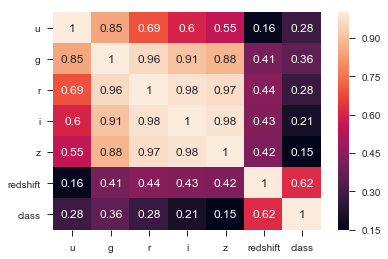

In [55]:
sns.heatmap(corr, annot=True)

La característica con mayor relación respecto a la clase es el desplazamiento al rojo (redshift)

## Construyendo un Random Forest Classifier

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [60]:
y = data["class"]
x = data[["ra", "dec", "u", "g", "r", "i", "z"]]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123, stratify=y)

In [64]:
x_train.shape

(7000, 7)

In [65]:
y_train.shape

(7000,)

In [66]:
x_test.shape

(3000, 7)

In [67]:
y_test.shape

(3000,)

In [63]:
model = RandomForestClassifier()

### Feature Scaling
Estandarizamos nuestro dataset en el intervalo $[-1, 1]$ con MinMaxScaler()

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

## Optimización de hiperparámetros (Hyperparameter Tuning)

En Machine Learning, normalmente se realizan dos tareas al mismo tiempo: validación cruzada y ajuste hiperparámetros de los modelos. La validación cruzada es el proceso de capacitar a los modelos un conjunto de datos para que puedan probarlos de manera recursiva con la intención de encontrar la configuración que maximice la precisión del mismo. En esta parte del artículo hacemos uso de una combinación de validación cruzada y el ajuste de parámetros con scikit-learn.

Antes de buscar qué combinación de valores de parámetros conduce al modelo más preciso, debemos especificar los diferentes valores candidatos que queremos probar mediante un simple diccionario. En el siguiente código tenemos una serie de valores de parámetros candidatos, que incluyen varias posibilidades para los siguientes hiperparámetros: 
* n_estimators: número de estimadores en el Random Forest.
* max_features: número máximo de atributos para la partición de nodos; generalmente < número de características en el dataset.
* max_depth: número de niveles en cada Decision Tree.
* min_samples_split: número mínimo de datos en un nodo antes de que este se parta hacia el siguiente nivel.
* min_samples_leaf: número mínimo de datos en un único nodo.
* criterion: métrica usada para fijar el stopping criteria de los árboles de decisión.

Para limitar la búsqueda, primero se ejecuta una validación cruzada de búsqueda aleatoria. Se realiza una búsqueda aleatoria de parámetros usando k=10 veces la validación cruzada (cv = 10), en 100 combinaciones diferentes (n_iter = 100) y con todos los núcleos disponibles al mismo tiempo (n_jobs = -1). **Random Search** selecciona una combinación de características al azar en lugar de iterar en cada combinación posible. Una mayor n_iter y cv dan como resultado más combinaciones y menos posibilidad de overfitting respectivamente.

Procedemos a imprimir los parámetros sobre los que vamos a hacer una búsqueda más adelante.

In [74]:
from pprint import pprint
pprint(model.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
hyperparameters = {'max_features':[None, 'auto', 'sqrt', 'log2'],
                   'max_depth':[None, 1, 5, 10, 15, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                   'criterion': ['gini', 'entropy']}

Para limitar la búsqueda, primero se ejecuta una validación cruzada de búsqueda aleatoria. Se realiza una búsqueda aleatoria de parámetros usando $k = 10$ veces la validación cruzada (cv = 10), en 100 combinaciones diferentes (n_iter = 100) y con todos los núcleos disponibles al mismo tiempo (n_jobs = -1). La Random Search selecciona una combinación de características al azar en lugar de iterar en cada combinación posible. Una mayor n_iter y cv dan como resultado más combinaciones y menos posibilidad de overfitting respectivamente.

In [77]:
rf_random = RandomizedSearchCV(model,
                               hyperparameters, 
                               n_iter = 100, 
                               cv = 10, 
                               verbose=2, 
                               random_state=123, 
                               n_jobs = -1)

Ejecutamos la búsqueda aleatoria mediante el entrenamiento de múltiples Random Forest con los parámetros anteriormente definidos permutados.

In [79]:
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, criterion=entropy 

[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini 


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, total=   1.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, total=   1.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, total=   0.9s
[CV] n_estimators=90, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=15, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, total=   1.0s
[CV] n_estimators=90, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=15, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2,

[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy, total=   1.8s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy, total=   1.8s
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy, total=   1.8s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, criterion=entropy 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy, total=   1.8s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimato

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, criterion=entropy, total=   1.3s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, criterion=entropy, total=   1.3s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini, total=   0.3s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini, total=   0.3s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini 
[CV]  n_estimators=20, min_samples_s

[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   1.7s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   1.7s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   1.8s
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini, total=   0.9s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini 
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini 
[CV]  n_estimators=60, mi

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.9s


[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini, total=   1.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, criterion=gini, total=   1.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy, total=   2.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy, total=   2.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, criterion=entropy 
[CV]  n_estimato

[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=20, criterion=entropy, total=   4.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=20, criterion=entropy, total=   4.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=20, criterion=entropy, total=   4.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=20, criterion=entropy, total=   4.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=1, criterion=gini 
[CV]  n_estimators=70, min_sampl

[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=10, criterion=entropy 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=entropy, total=   0.2s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=10, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=10, criterion=entropy, total=   2.0s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=10, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=10, criterion=entropy, total=   2.0s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=10, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=20, criterion=entropy, total=   4.9s
[CV]  n_estimators=30

[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=entropy, total=   1.1s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=entropy, total=   1.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=5, criterion=gini 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=entropy, total=   1.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=5, criterion=gini 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=entropy, total=   1.1s
[CV] n_estimators=10, min_samples_

[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, total=   0.8s
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, total=   0.8s
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, total=   0.9s
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=entropy, total=   0.8s
[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=entropy 
[CV]  n_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=1, criterion=gini, total=   0.1s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=None, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=2, m

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.0s


[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=gini, total=   1.2s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=gini 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=gini, total=   1.2s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=gini 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=gini, total=   1.2s
[CV] n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, criterion=gini 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=gini, total=   1.2s
[CV] n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=1, criterion=gini 
[CV]  n_estimators=70, min_samples_split

[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini, total=   0.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini 
[CV]  n_estimators=80, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=5, criterion=entropy, total=   3.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini 
[CV]  n_estimators=80, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=5, criterion=entropy, total=   3.6s
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini, total=   0.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini 
[CV] n_estimators=50, min_samples_split=

[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=80, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=5, criterion=entropy, total=   3.6s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, total=   0.8s
[CV] n_

[CV] n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini 
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=5, criterion=entropy 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=5, criterion=entropy 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=5, criterion=entropy 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=5, criterion=entropy 
[CV]  n_estimators=90, min_samples_split=2, min_sam

[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=gini, total=   1.2s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=5, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=gini, total=   1.3s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=5, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=gini, total=   1.2s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=5, criterion=gini 
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=None, criterion=gini, total=   1.2s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=log2, max_depth=5, criterion=gini 
[CV]  n_estimators=70, min_samples_split

[CV] n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=1, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=20, criterion=entropy, total=   0.8s
[CV] n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=1, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=20, criterion=entropy, total=   0.7s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini 
[CV]  n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=1, criterion=entropy, total=   0.2s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini 
[CV]  n_estimators=40, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=1, criterion=entropy, total=   0.2s
[CV] n_estimators=40, min_samp

[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, total=   0.2s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=gini, total=   1.0s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy, total=   0.2s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=gini, total=   1.0s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=1, criterion=entropy 
[CV]  n_estimators=70, m

[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=15, criterion=entropy, total=   6.9s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.5s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.6s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.5s
[CV] n_estimators=7

[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=5, criterion=entropy, total=   0.6s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=5, criterion=entropy, total=   0.6s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=5, criterion=entropy, total=   0.6s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=5, criterion=entropy, total=   0.6s
[CV] n_estimators=70, min_sa

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min


[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini, total=   1.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini, total=   1.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini, total=   1.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=70, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=10, criterion=gini, total=   1.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=50, min_samples_split

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=15, criterion=gini, total=   0.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=None, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=15, criterion=gini, total=   0.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=None, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=15, criterion=gini, total=   0.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=None, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=15, criterion=gini, total=   0.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=None, criterion=entropy 
[CV]  n_estimators=1

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   3.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   3.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   3.3s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   3.3s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators

[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=5, criterion=entropy 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=5, criterion=entropy, total=   0.7s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=5, criterion=entropy 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=5, criterion=entropy, total=   0.7s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=5, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, total=   1.6s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=5, criterion=entropy 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, total=   1.6s
[CV] n_estimators=50, min_sa

[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   0.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   0.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   0.6s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=15, criterion=entropy, total=   0.6s
[CV] n_estimators=10

[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, criterion=gini, total=   0.5s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, criterion=gini, total=   0.5s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, criterion=gini, total=   0.5s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=4, max_features=log2, max_depth=20, criterion=gini, total=   0.5s
[CV] n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=15, criterion=entropy 
[CV]  n_estimators=30, min_s

[CV]  n_estimators=90, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=1, criterion=gini, total=   0.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=90, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=1, criterion=gini, total=   0.7s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.3s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.3s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=entropy, total=   0.3s
[CV] n_estima

[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=2, max_features=log2, max_depth=10, criterion=entropy 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=None, max_depth=1, criterion=gini, total=   0.4s
[CV] n_estimators=30, min_samples_split=10, min

[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=None, criterion=gini 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=10, criterion=gini, total=   3.2s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=None, criterion=gini 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=10, criterion=gini, total=   3.2s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=None, criterion=gini 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=10, criterion=gini, total=   3.2s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=None, criterion=gini 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=10, criterion=gini, total=   3.2s
[CV] n_estimators=60, min_sample

[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=5, criterion=gini 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=None, criterion=gini, total=   2.7s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=5, criterion=gini 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=None, criterion=gini, total=   2.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=5, criterion=gini 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=5, criterion=gini, total=   1.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=5, criterion=gini 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=None, max_depth=5, criterion=gini, total=   1.3s
[CV] n_estimators=50, min_samples_split=

[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=None, criterion=gini 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=None, criterion=gini, total=   2.0s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=None, criterion=gini, total=   2.0s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, total=   0.5s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, criterion=entropy, total=   0.5s
[CV] n_est

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.6min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'max_features': [None, 'auto', 'sqrt', 'log2'], 'max_depth': [None, 1, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [80]:
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy'}

## Entrenando el clasificador Random Forest

In [81]:
model.set_params(n_estimators=80,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 max_features=None,
                 max_depth=None,
                 criterion="entropy"
                )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Testeando y evaluando el modelo

In [85]:
sorted_labels = model.classes_

In [86]:
y_pred = model.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score, f1_score

accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average=None)

La precisión conjunta del test dataset se puede obtener a continuación:

In [89]:
print("Accuracy score: {:.3f}".format(accscore))

Accuracy score: 0.933


Podemos visualizar la F1-Score para cada clase:

In [92]:
for i in range(len(sorted_labels)):
    print("F1-Score for {}: {:.4f}".format(inverse_class_mapper[i], f1score[i]))

F1-Score for STAR: 0.9315
F1-Score for GALAXY: 0.9391
F1-Score for QSO: 0.9087


In [94]:
validation_dataset = pd.DataFrame()
validation_dataset["Actual"] = data["class"]
prediction = model.predict(x)
validation_dataset["Prediction"] = prediction

In [95]:
validation_dataset.head(15)

,Actual,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1
